In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [8]:

class Perceptron:
    def __init__(self, input_size):
        self.weights = np.zeros(input_size)
        self.bias = 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        if summation > 0:
            return 1
        else:
            return 0

    def train(self, training_inputs, labels, epochs):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights += (label - prediction) * inputs
                self.bias += label - prediction


In [9]:

# Cargar el dataset de Iris
iris = load_iris()
X = iris.data[:, :2]  # Tomar solo las dos primeras características para graficar
y = (iris.target != 0).astype(int)  # Clasificar las flores en setosa (0) y no setosa (1)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el perceptrón
perceptron = Perceptron(input_size=2)
perceptron.train(X_train, y_train, epochs=10)

# Obtener las predicciones del perceptrón para los datos de prueba
predictions = [perceptron.predict(x) for x in X_test]




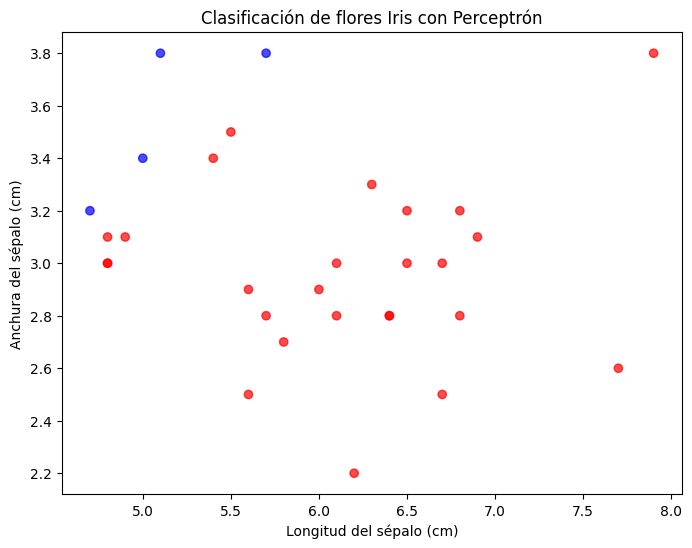

In [10]:
# Graficar la separación de clases
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='bwr', alpha=0.7)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Anchura del sépalo (cm)')
plt.title('Clasificación de flores Iris con Perceptrón')
plt.show()